In [1]:
#---------------------------------------------------------------------------#
#Step 1 - Understanding and presenting the business problem
#The challenge selected - Kaggle - Bike Sharing Demand
#---------------------------------------------------------------------------#

In [2]:
#1.A - The KPI
#Submissions are evaluated by the RMSLE.

In [101]:
#1.B - Feature engineering

#Used Vivek Srinivasan - EDA & Ensemble Model (Top 10 Percentile)
#as a reference

import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

hourly_data = pd.read_csv("train.csv")
hourly_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


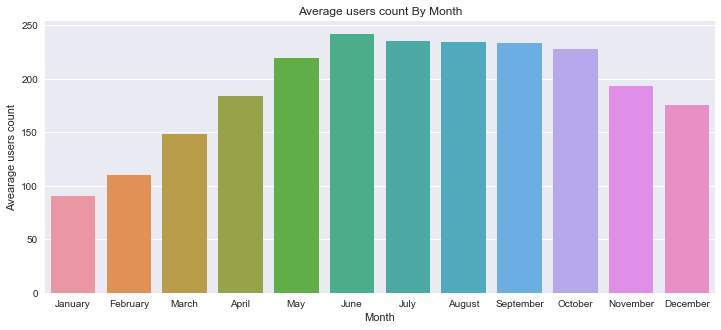

In [91]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)

#Show avg userscount per month
hourly_data["date"] = hourly_data.datetime.apply(lambda x : x.split()[0])
hourly_data["month"] = hourly_data.date.apply(\
    lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])


sort_order = ["January","February","March","April","May",\
             "June","July","August","September","October","November","December"]

month_aggregated = pd.DataFrame(hourly_data.groupby("month")["count"].mean()).reset_index()
month_sorted = month_aggregated.sort_values(by="count",ascending=False)
sn.barplot(data=month_sorted,x="month",y="count",ax=ax1,order=sort_order)
ax1.set(xlabel='Month', ylabel='Avearage users count',title="Average users count By Month")


#May - October is high season
#June is peak time

 None]

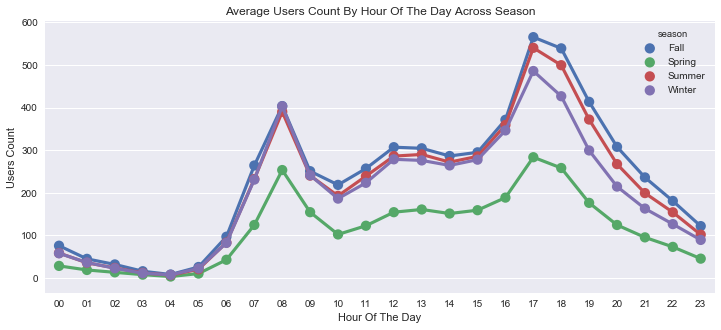

In [92]:
fig,(ax2)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)
#Average Users Count By Hour Of The Day Across Season

hourly_data["hour"] = hourly_data.datetime.apply(lambda x : x.split()[1].split(":")[0])

hourly_data["season"] = hourly_data.season.map(\
                        {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
hourly_data["season"] = hourly_data["season"].astype("category")

hour_aggregated = pd.DataFrame(hourly_data.groupby(\
                        ["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hour_aggregated["hour"], y=hour_aggregated["count"],\
             hue=hour_aggregated["season"], data=hour_aggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',\
        title="Average Users Count By Hour Of The Day Across Season",label='big')

#00:00 - 05:00 - night low count
#07:00 - 09:00 - morning peak 
#16:00 - 18:00 - afternoon peak
#Spring is a weaker season

 None]

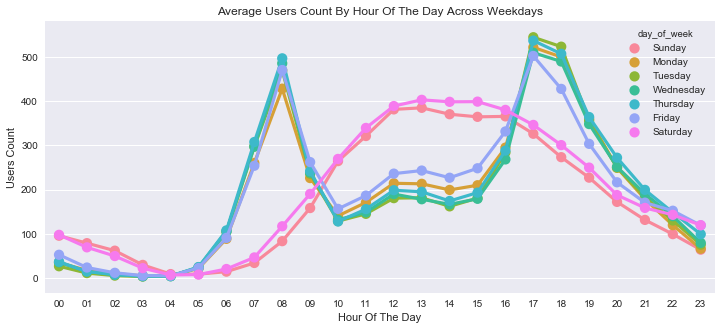

In [93]:
fig,(ax3)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)

#Average Users Count By Hour Of The Day Across Weekdays


hourly_data["day_of_week"] = hourly_data.date.apply(\
    lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

day_of_week_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
hour_aggregated = pd.DataFrame(hourly_data.groupby(\
                    ["hour","day_of_week"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hour_aggregated["hour"],y=hour_aggregated["count"],\
    hue=hour_aggregated["day_of_week"],hue_order=day_of_week_order,\
             data=hour_aggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',\
        title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


#Peak hours - 07:00 - 09:00 and 16:00 - 18:00 relevant to weekdays
#On weekend - different peak - 12:00 - 17:00

 None]

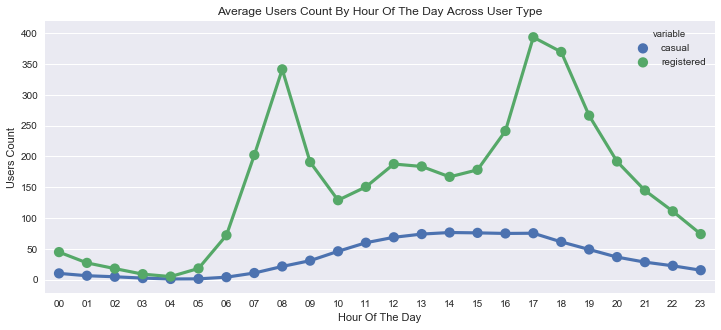

In [97]:
#Average Users Count By Hour Of The Day Across User Type
fig,(ax4)= plt.subplots(nrows=1)
fig.set_size_inches(12,5)

hour_transformed = pd.melt(hourly_data[["hour","casual","registered"]],\
                           id_vars=['hour'], value_vars=['casual', 'registered'])
hour_aggregated = pd.DataFrame(hour_transformed.groupby(\
                           ["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hour_aggregated["hour"], y=hour_aggregated[\
                           "value"],hue=hour_aggregated["variable"],\
             hue_order=["casual","registered"], data=hour_aggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',\
        title="Average Users Count By Hour Of The Day Across User Type",label='big')


#Peak hours - 07:00 - 09:00 and 16:00 - 18:00 relevant for registered users
#For casual users - different peak - very moderate - 12:00 - 17:00


 None]

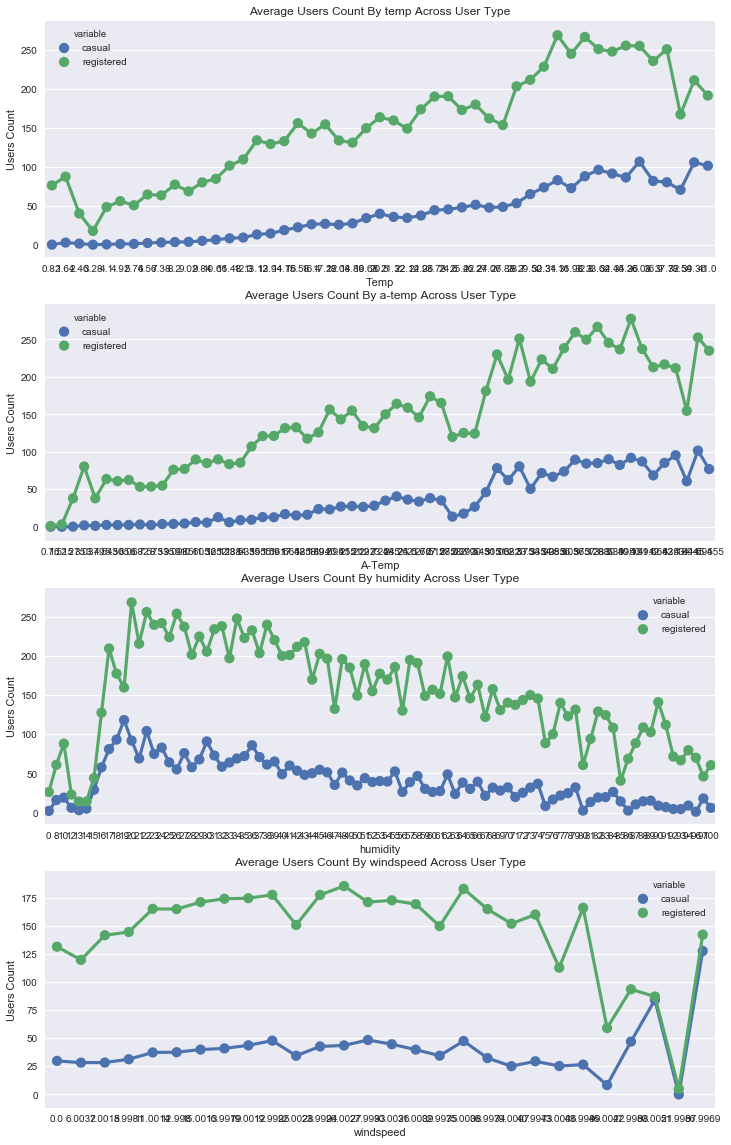

In [108]:
#Average Users Count By temp Of The Day Across User Type
fig,(ax5,ax6,ax7,ax8)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)

temp_transformed = pd.melt(hourly_data[["temp","casual","registered"]],\
                           id_vars=['temp'], value_vars=['casual', 'registered'])
temp_aggregated = pd.DataFrame(temp_transformed.groupby(\
                           ["temp","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=temp_aggregated["temp"], y=temp_aggregated[\
                           "value"],hue=temp_aggregated["variable"],\
             hue_order=["casual","registered"], data=temp_aggregated, join=True,ax=ax5)
ax5.set(xlabel='Temp', ylabel='Users Count',\
        title="Average Users Count By temp Across User Type",label='big')

#Average Users Count By a-temp Of The Day Across User Type
atemp_transformed = pd.melt(hourly_data[["atemp","casual","registered"]],\
                           id_vars=['atemp'], value_vars=['casual', 'registered'])
atemp_aggregated = pd.DataFrame(atemp_transformed.groupby(\
                           ["atemp","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=atemp_aggregated["atemp"], y=atemp_aggregated[\
                           "value"],hue=atemp_aggregated["variable"],\
             hue_order=["casual","registered"], data=atemp_aggregated, join=True,ax=ax6)
ax6.set(xlabel='A-Temp', ylabel='Users Count',\
        title="Average Users Count By a-temp Across User Type",label='big')

#Average Users Count By humidity Of The Day Across User Type
humidity_transformed = pd.melt(hourly_data[["humidity","casual","registered"]],\
                           id_vars=['humidity'], value_vars=['casual', 'registered'])
humidity_aggregated = pd.DataFrame(humidity_transformed.groupby(\
                           ["humidity","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=humidity_aggregated["humidity"], y=humidity_aggregated[\
                           "value"],hue=humidity_aggregated["variable"],\
             hue_order=["casual","registered"], data=humidity_aggregated, join=True,ax=ax7)
ax7.set(xlabel='humidity', ylabel='Users Count',\
        title="Average Users Count By humidity Across User Type",label='big')

#Average Users Count By wind speed Of The Day Across User Type
windspeed_transformed = pd.melt(hourly_data[["windspeed","casual","registered"]],\
                           id_vars=['windspeed'], value_vars=['casual', 'registered'])
windspeed_aggregated = pd.DataFrame(windspeed_transformed.groupby(\
                           ["windspeed","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=windspeed_aggregated["windspeed"], y=windspeed_aggregated[\
                           "value"],hue=windspeed_aggregated["variable"],\
             hue_order=["casual","registered"], data=windspeed_aggregated, join=True,ax=ax8)
ax8.set(xlabel='windspeed', ylabel='Users Count',\
        title="Average Users Count By windspeed Across User Type",label='big')

#Low users count on "extreme" terms - when very hot,cold , humid or windy...
#No significant conclusion - howerver a dipper drill down will be made here during the project

In [109]:
#Future feature engineering:
# -- break down weather to categories:
#    Cloudy (No, Partly, Yes)
#    Clouds (No, Few , Scattered)
#    Rain (No,Light,Heavy)
#    Snow (No, Lght, Yes)
#    Fog (Yes,No)
#    Mist(Yes,No)
#    Thunderstorm (Yes,No)

#Check different scales for nummeric values - log, square etc...

#drill deeper into work-day, week-day and holiday

#Sky is the limit :)

